<a href="https://colab.research.google.com/github/Pontessxx/machineLearn-valorapartamento/blob/main/Machine01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as lib utilizadas neste projeto de IA


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.graph_objects as go
import plotly.express as px

# Importando o dataframe

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Pontessxx/machineLearn-valorapartamento/main/sao-paulo-properties-april-2019.csv')
df

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,Jabaquara/São Paulo,sale,apartment,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,Jabaquara/São Paulo,sale,apartment,-23.652060,-46.637046


In [4]:
df.columns

Index(['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking',
       'Elevator', 'Furnished', 'Swimming Pool', 'New', 'District',
       'Negotiation Type', 'Property Type', 'Latitude', 'Longitude'],
      dtype='object')

Já está tratados os dados puxados do Kaggle

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

Separando o dataframe entre alugel e venda, iremos utilizar apenas os de aluguel para nosso modelo de IA

In [6]:
df_rent = df[df['Negotiation Type']=='rent']
df_sale = df[df['Negotiation Type']=='sale']

In [7]:
df_rent

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,0,Brooklin/São Paulo,rent,apartment,-23.617682,-46.694963
11206,21000,3000,208,4,4,3,3,1,1,1,0,Brooklin/São Paulo,rent,apartment,-23.606891,-46.695934
11207,3800,710,55,1,1,0,1,0,1,1,0,Brooklin/São Paulo,rent,apartment,0.000000,0.000000
11208,5000,2354,205,3,2,1,2,1,0,0,0,Brooklin/São Paulo,rent,apartment,-23.612287,-46.681482


In [8]:
df_rent.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000
mean,3077.669065,825.194798,89.486165,2.304234,2.105562,1.024488,1.452269,0.299806,0.172939,0.487963,0.000830,-22.032278,-43.500873
std,3522.830284,835.621937,63.976416,0.829108,0.998162,0.884241,0.889535,0.458205,0.378220,0.499890,0.028802,5.962534,11.675070
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.749039,-58.364352
25%,1350.000000,395.750000,52.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.598066,-46.689788
50%,2000.000000,595.000000,67.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.555869,-46.644793
75%,3300.000000,990.000000,100.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,-23.522756,-46.585110
max,50000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000


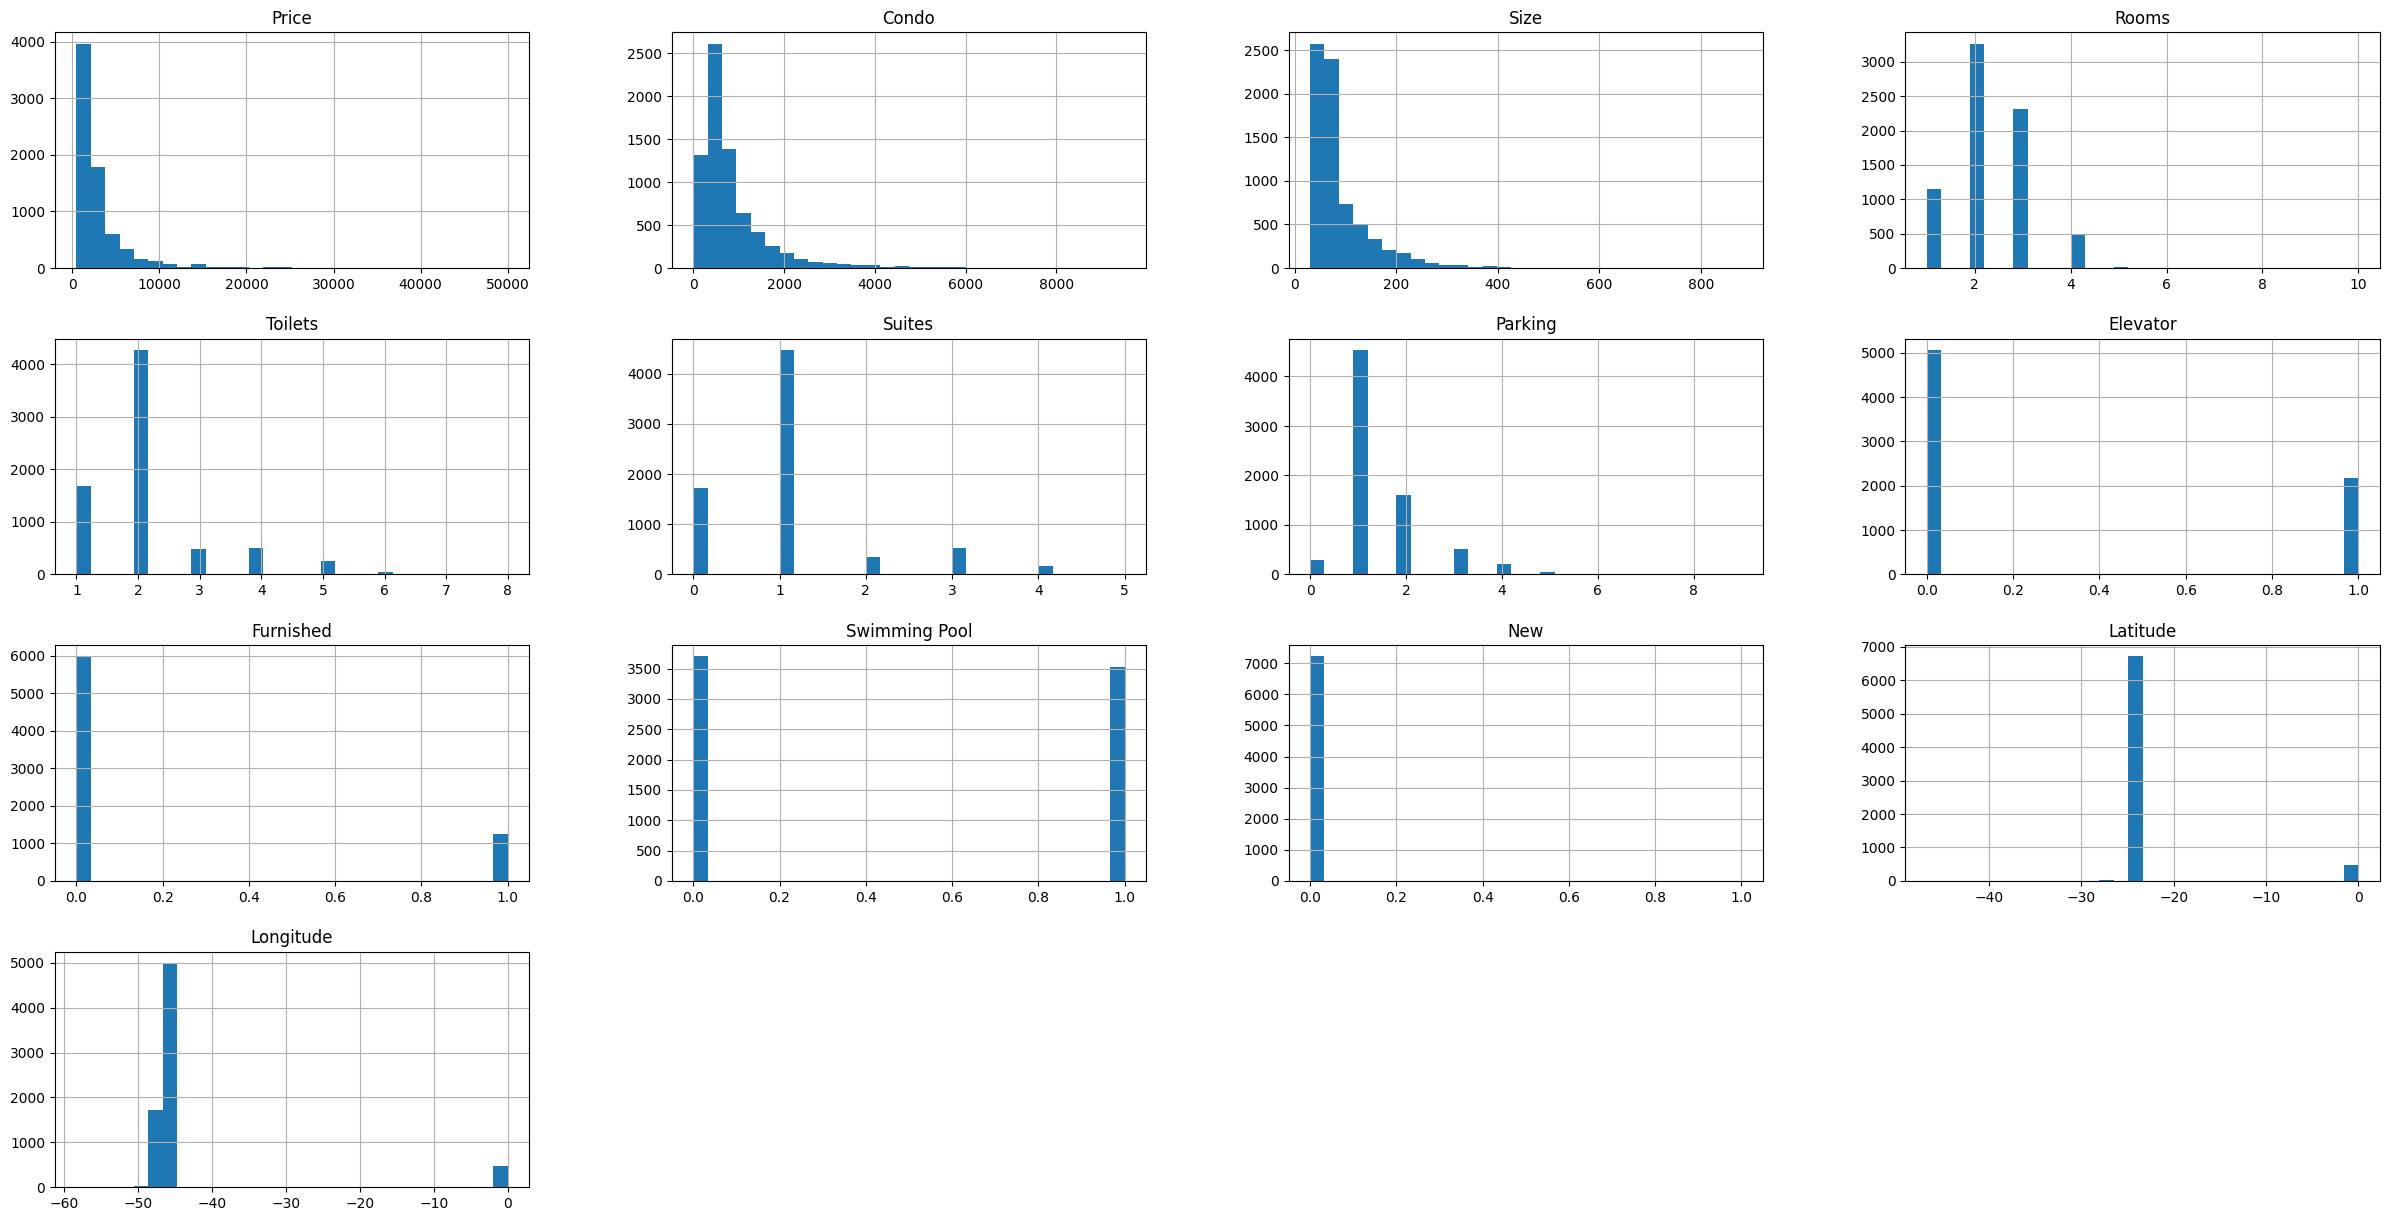

In [9]:
df_rent.hist(bins=30,figsize=(30,15))
plt.show()

In [10]:
df_rent['Price'].median()


2000.0

In [11]:
df_rent['Property Type'].value_counts()

apartment    7228
Name: Property Type, dtype: int64

In [12]:
df_rent['Suites'].value_counts()

1    4474
0    1715
3     523
2     353
4     159
5       4
Name: Suites, dtype: int64

## Separando dados para treino e teste

In [13]:
df_cleaned = df_rent.drop(['New','Property Type','Negotiation Type'],axis=1)

In [14]:
df_cleaned

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,Artur Alvim/São Paulo,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,Brooklin/São Paulo,-23.617682,-46.694963
11206,21000,3000,208,4,4,3,3,1,1,1,Brooklin/São Paulo,-23.606891,-46.695934
11207,3800,710,55,1,1,0,1,0,1,1,Brooklin/São Paulo,0.000000,0.000000
11208,5000,2354,205,3,2,1,2,1,0,0,Brooklin/São Paulo,-23.612287,-46.681482


In [15]:
one_hot = pd.get_dummies(df_cleaned['District'])
one_hot

,Alto de Pinheiros/São Paulo,Anhanguera/São Paulo,Aricanduva/São Paulo,Artur Alvim/São Paulo,Barra Funda/São Paulo,Bela Vista/São Paulo,Belém/São Paulo,Bom Retiro/São Paulo,Brasilândia/São Paulo,Brooklin/São Paulo,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11206,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11207,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11208,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df = df_cleaned.drop('District',axis=1)
df = df.join(one_hot)
df

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,930,220,47,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000,148,45,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000,100,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000,200,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1300,410,55,2,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11206,21000,3000,208,4,4,3,3,1,1,1,...,0,0,0,0,0,0,0,0,0,0
11207,3800,710,55,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
11208,5000,2354,205,3,2,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
Y = df['Price']
X = df.loc[: ,df.columns != 'Price']

In [19]:
X

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,Latitude,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,220,47,2,2,1,1,0,0,0,-23.543138,...,0,0,0,0,0,0,0,0,0,0
1,148,45,2,2,1,1,0,0,0,-23.550239,...,0,0,0,0,0,0,0,0,0,0
2,100,48,2,2,1,1,0,0,0,-23.542818,...,0,0,0,0,0,0,0,0,0,0
3,200,48,2,2,1,1,0,0,0,-23.547171,...,0,0,0,0,0,0,0,0,0,0
4,410,55,2,2,1,1,1,0,0,-23.525025,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,595,73,1,2,1,1,0,0,1,-23.617682,...,0,0,0,0,0,0,0,0,0,0
11206,3000,208,4,4,3,3,1,1,1,-23.606891,...,0,0,0,0,0,0,0,0,0,0
11207,710,55,1,1,0,1,0,1,1,0.000000,...,0,0,0,0,0,0,0,0,0,0
11208,2354,205,3,2,1,2,1,0,0,-23.612287,...,0,0,0,0,0,0,0,0,0,0


In [20]:
Y

0          930
1         1000
2         1000
3         1000
4         1300
         ...  
11205     3700
11206    21000
11207     3800
11208     5000
11209    15600
Name: Price, Length: 7228, dtype: int64

In [21]:
X_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [22]:
y_train

2380     1000
3138     2500
4007     7500
67       1350
1807     1400
         ... 
5387     3300
1172     1190
9924     1855
10106    1100
10403    2500
Name: Price, Length: 5059, dtype: int64

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [24]:
y_test.iloc[0]

4700

In [27]:
x_test.iloc[0].head(10)

Condo            1000.000000
Size              117.000000
Rooms               2.000000
Toilets             4.000000
Suites              2.000000
Parking             2.000000
Elevator            0.000000
Furnished           0.000000
Swimming Pool       1.000000
Latitude          -23.522927
Name: 1627, dtype: float64

In [29]:
rf_reg.predict(x_test.iloc[0].values.reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([4089.5])

In [32]:
n = 2

print(y_test.iloc[n])
print(x_test.iloc[n].head(10))

rf_reg.predict(x_test.iloc[n].values.reshape(1,-1))[0]

7000
Condo            2050.000000
Size              250.000000
Rooms               4.000000
Toilets             3.000000
Suites              2.000000
Parking             2.000000
Elevator            0.000000
Furnished           0.000000
Swimming Pool       0.000000
Latitude          -23.558938
Name: 4744, dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


8461.98

In [42]:
df_cleaned.corr()

<ipython-input-42-32b4bd7cf4f2>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,Latitude,Longitude
Price,1.000000,0.700361,0.731795,0.390951,0.583488,0.588329,0.640743,0.031860,0.171859,0.206884,-0.036935,-0.038362
Condo,0.700361,1.000000,0.812374,0.494153,0.596520,0.597069,0.703888,0.020271,0.075928,0.198613,-0.045458,-0.048381
Size,0.731795,0.812374,1.000000,0.673232,0.694294,0.701954,0.752954,0.006993,0.005886,0.148408,-0.043168,-0.046238
Rooms,0.390951,0.494153,0.673232,1.000000,0.557247,0.545859,0.592387,0.000993,-0.104705,0.151225,-0.050753,-0.052897
Toilets,0.583488,0.596520,0.694294,0.557247,1.000000,0.920932,0.703447,0.143176,0.068190,0.262526,-0.128304,-0.129482
Suites,0.588329,0.597069,0.701954,0.545859,0.920932,1.000000,0.718788,0.106189,0.068014,0.267219,-0.130413,-0.131519
Parking,0.640743,0.703888,0.752954,0.592387,0.703447,0.718788,1.000000,0.027476,0.066077,0.304904,-0.054828,-0.057929
Elevator,0.031860,0.020271,0.006993,0.000993,0.143176,0.106189,0.027476,1.000000,0.095207,0.150773,-0.117160,-0.108175
Furnished,0.171859,0.075928,0.005886,-0.104705,0.068190,0.068014,0.066077,0.095207,1.000000,0.185192,-0.022449,-0.018386
Swimming Pool,0.206884,0.198613,0.148408,0.151225,0.262526,0.267219,0.304904,0.150773,0.185192,1.000000,-0.025033,-0.020293


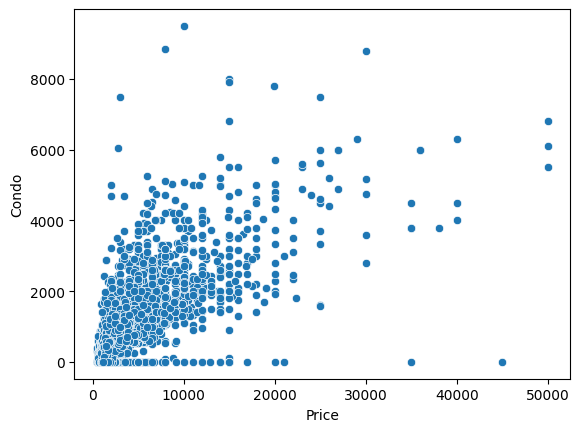

In [39]:
fig = sns.scatterplot(df_cleaned, x='Price', y='Condo')

plt.show()